In [10]:
from laplace0 import laplace0
from scipy.linalg import cholesky, norm, qr, eigvalsh, LinAlgError, svd, inv, lu, det, eig
from scipy.sparse import eye
import numpy as np
from numpy import prod
from matplotlib.pyplot import subplot, spy, figure, title, semilogy, grid
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

In [ ]:
# (2)(a): What does the function do?

# ???

In [4]:
# (2)(b): Create matrix A using the default arguments

A = laplace0()
print(A.shape)

(40, 40)


Shape of A: (40, 40)


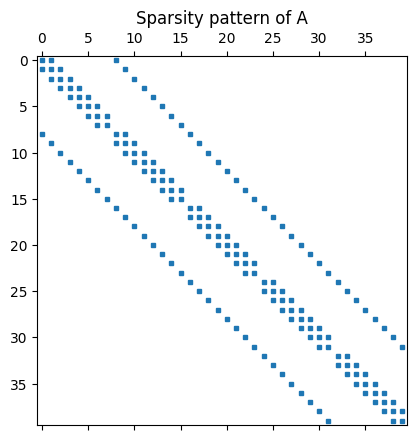

Symmetric: True
Min eigenvalue: 0.3885639508593018
Positive definite: True
Orthogonal: True
Lower bandwidth: 8, Upper bandwidth: 8, Total: 17
Toeplitz: False


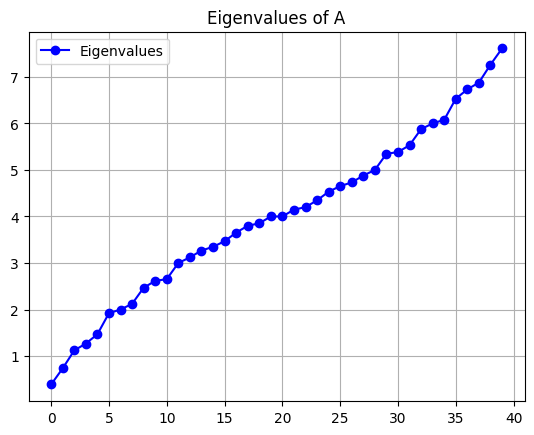

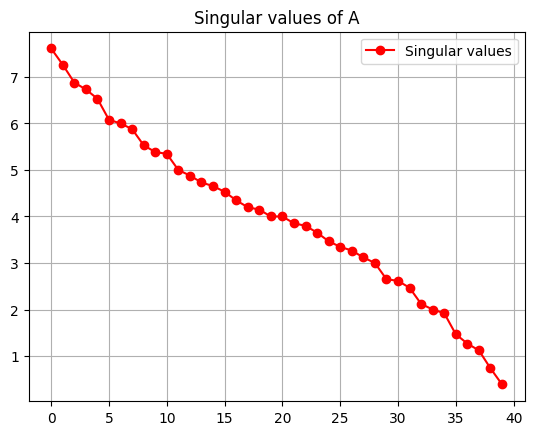

det(A) = 2.662079368040435e+21


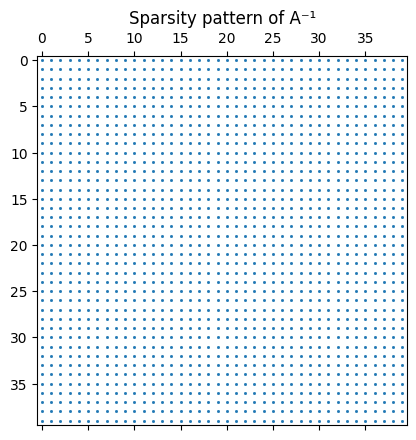

In [11]:
# (2)(c):   Say as much as you can about A

# (i):      Dimensions
print("Shape of A:", A.shape)

# (ii):     Is A stored as a sparse matrix? Create a spy plot
A_sparse = csr_matrix(A)
plt.spy(A_sparse, markersize=3)
plt.title("Sparsity pattern of A")
plt.show()

# (iii):    Is A symmetric?
print("Symmetric:", np.allclose(A, A.T, atol=1e-12))

# (iv):     Is A positive definite?
eigs = eigvalsh(A)
print("Min eigenvalue:", np.min(eigs))
print("Positive definite:", np.all(eigs > 0))

# (v):      Is A orthogonal?
Q, _ = np.linalg.qr(A)
print("Orthogonal:", np.allclose(Q.T @ Q, np.eye(Q.shape[1])))

# (vi):     Is A banded?
def get_bandwidth(M, tol=1e-12):
    lower_bw = 0
    upper_bw = 0
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            if abs(M[i, j]) > tol:
                if j < i:
                    lower_bw = max(lower_bw, i - j)
                elif j > i:
                    upper_bw = max(upper_bw, j - i)
    return lower_bw, upper_bw, lower_bw + upper_bw + 1
lbw, ubw, bw_total = get_bandwidth(A)
print(f"Lower bandwidth: {lbw}, Upper bandwidth: {ubw}, Total: {bw_total}")

# (vii):    Is A Toeplitz?
def is_toeplitz(M):
    return all(np.allclose(np.diag(M, k), M[0, k] * np.ones(M.shape[0] - abs(k))) for k in range(-M.shape[0]+1, M.shape[1]))
print("Toeplitz:", is_toeplitz(A))

# (viii):   What are the eigenvalues and singular values? Plot them.
eigvals = eigvalsh(A)
plt.plot(eigvals, 'bo-', label='Eigenvalues')
plt.title("Eigenvalues of A")
plt.grid(True)
plt.legend()
plt.show()

svals = svd(A, compute_uv=False)
plt.plot(svals, 'ro-', label='Singular values')
plt.title("Singular values of A")
plt.grid(True)
plt.legend()
plt.show()

# (ix):     What is the determinant?
det_A = det(A)
print("det(A) =", det_A)

# (x):      Does the inverse exist?
A_inv = inv(A)
plt.spy(A_inv, markersize=1)
plt.title("Sparsity pattern of A⁻¹")
plt.show()

# (xi):     Calculate LU, Cholesky, QR, Spectral and SVD factorisation
# LU
P, L, U = lu(A)
# Cholesky
R = cholesky(A)
# QR
Q, R_qr = qr(A)
# Spectral (eigen decomposition)
D, V = eig(A)
# SVD
U_svd, S, Vh = svd(A)